In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd 
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.decomposition import PCA
import sys
import scipy.stats as st
from scipy.stats import ks_2samp,bartlett,ttest_ind

Importation des fichiers de données pour travaux

In [32]:

sys.path.append('../code')
print(sys.path)

['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/dist-packages', '/usr/local/lib/python3.5/dist-packages/daemonocle-1.0.1-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/certifi-2018.1.18-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/click-6.7-py3.5.egg', '/usr/local/lib/python3.5/dist-packages/setuptools-39.0.1-py3.5.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/silvock/.ipython', '../code', '../code']


In [33]:
import my_functions_revue as mfct

In [34]:
data = pd.read_csv('../fichiers_csv/population_2012.csv')

data2 = pd.read_csv('../fichiers_csv/df_base_projet3.csv')

# Mission 1 : Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :

    Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage.
    Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays.
    Disponibilité alimentaire en protéines par habitant.
    Disponibilité alimentaire en calories par habitant.


## Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage.

In [35]:
data.drop(['Code Domaine','Domaine', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code Année', 'Unité','Année'], axis=1, inplace=True)

In [36]:
data['Population 2012 en milliers'] = data['Valeur']
del data['Valeur']
data.head()

,Code Pays,Pays,Population 2012 en milliers
0,2,Afghanistan,29825
1,202,Afrique du Sud,52386
2,3,Albanie,3162
3,4,Algérie,38482
4,79,Allemagne,82800


In [37]:
data2.head()

,Code Pays,Pays,Année,Produit,Code Produit,Nature Produit,Aliments pour animaux (en milliers de tonnes),Autres Utilisations (en milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Semences (en milliers de tonnes),Traitement (en milliers de tonnes),Population totale (en milliers),Disponibilité alimentaire (Kcal/an),Disponibilité alimentaire en quantité (kg/an),ratio_energie_poids en Kcal/an,Nature Produit 2,Disponibilité de protéines en quantité (Kg/an),ratio_poids_proteines_poids_total_en_kg_an,Nature Produit 3
0,1,Arménie,2013,Abats Comestible,2736,autre,0.0,3.0,14.0,4.59,...,0.0,0.0,2977.0,15212470.0,13664.43,1113.289760,animal,2444.86125,0.178922,non viande
1,2,Afghanistan,2013,Abats Comestible,2736,autre,0.0,0.0,5.0,1.72,...,0.0,0.0,30552.0,55757400.0,52549.44,1061.046512,animal,8586.63960,0.163401,non viande
2,3,Albanie,2013,Abats Comestible,2736,autre,0.0,0.0,11.0,3.50,...,0.0,0.0,3173.0,12739595.0,11105.50,1147.142857,animal,1853.03200,0.166857,non viande
3,4,Algérie,2013,Abats Comestible,2736,autre,0.0,0.0,4.0,1.45,...,0.0,0.0,39208.0,57243680.0,56851.60,1006.896552,animal,9015.87960,0.158586,non viande
4,7,Angola,2013,Abats Comestible,2736,autre,0.0,0.0,3.0,1.15,...,0.0,0.0,21472.0,23511840.0,24692.80,952.173913,animal,4388.87680,0.177739,non viande


In [38]:






df_base = pd.merge(data,data2)
df_base

,Code Pays,Pays,Population 2012 en milliers,Année,Produit,Code Produit,Nature Produit,Aliments pour animaux (en milliers de tonnes),Autres Utilisations (en milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),...,Semences (en milliers de tonnes),Traitement (en milliers de tonnes),Population totale (en milliers),Disponibilité alimentaire (Kcal/an),Disponibilité alimentaire en quantité (kg/an),ratio_energie_poids en Kcal/an,Nature Produit 2,Disponibilité de protéines en quantité (Kg/an),ratio_poids_proteines_poids_total_en_kg_an,Nature Produit 3
0,2,Afghanistan,29825,2013,Abats Comestible,2736,autre,0.0,0.0,5.0,...,0.0,0.0,30552.0,5.575740e+07,5.254944e+04,1061.046512,animal,8.586640e+03,0.163401,non viande
1,2,Afghanistan,29825,2013,"Agrumes, Autres",2614,autre,0.0,0.0,1.0,...,0.0,0.0,30552.0,1.115148e+07,3.941208e+04,282.945736,végétal,2.230296e+02,0.005659,non viande
2,2,Afghanistan,29825,2013,Aliments pour enfants,2680,autre,0.0,0.0,1.0,...,0.0,0.0,30552.0,1.115148e+07,1.833120e+03,6083.333333,végétal,3.345444e+02,0.182500,non viande
3,2,Afghanistan,29825,2013,Ananas,2618,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande
4,2,Afghanistan,29825,2013,Bananes,2615,autre,0.0,0.0,4.0,...,0.0,0.0,30552.0,4.460592e+07,8.249040e+04,540.740741,végétal,5.575740e+02,0.006759,non viande
5,2,Afghanistan,29825,2013,"Beurre, Ghee",2740,autre,0.0,0.0,23.0,...,0.0,0.0,30552.0,2.564840e+08,3.574584e+04,7175.213675,animal,3.345444e+02,0.009359,non viande
6,2,Afghanistan,29825,2013,Bière,2656,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,2.749680e+03,0.000000,végétal,0.000000e+00,0.000000,non viande
7,2,Afghanistan,29825,2013,Blé,2511,céréales,0.0,0.0,1369.0,...,322.0,0.0,30552.0,1.526638e+10,4.895347e+06,3118.548337,végétal,4.116011e+05,0.084080,non viande
8,2,Afghanistan,29825,2013,Boissons Alcooliques,2658,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande
9,2,Afghanistan,29825,2013,Café,2630,autre,0.0,0.0,0.0,...,0.0,0.0,30552.0,0.000000e+00,0.000000e+00,NaN,végétal,0.000000e+00,NaN,non viande


In [39]:
df_base['Evolution population 2012/2013 en pourcentage'] = (df_base['Population totale (en milliers)'] / df_base['Population 2012 en milliers'])*100-100 

In [40]:
df_base.columns

Index(['Code Pays', 'Pays', 'Population 2012 en milliers', 'Année', 'Produit',
       'Code Produit', 'Nature Produit',
       'Aliments pour animaux (en milliers de tonnes)',
       'Autres Utilisations (en milliers de tonnes)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure (en milliers de tonnes)',
       'Nourriture (en milliers de tonnes)', 'Pertes (en milliers de tonnes)',
       'Semences (en milliers de tonnes)',
       'Traitement (en milliers de tonnes)', 'Population totale (en milliers)',
       'Disponibilité alimentaire (Kcal/an)',
       'Disponibilité alimentaire en quantité (kg/an)',
       'ratio_energie_poids en Kcal/an', 'Nature Produit 2',
       'Disponibilité de protéines en quantité (Kg/an)',
       'ratio_poids_proteine

In [41]:
df_base.drop(['Population 2012 en milliers', 'Année', 'Aliments pour animaux (en milliers de tonnes)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité intérieure (en milliers de tonnes)','Nourriture (en milliers de tonnes)', 'Pertes (en milliers de tonnes)','Semences (en milliers de tonnes)','Traitement (en milliers de tonnes)', 'Population totale (en milliers)','Disponibilité alimentaire en quantité (kg/an)','ratio_energie_poids en Kcal/an','ratio_poids_proteines_poids_total_en_kg_an','Autres Utilisations (en milliers de tonnes)','Disponibilité alimentaire (Kcal/an)','Disponibilité de protéines en quantité (Kg/an)'], axis=1, inplace=True)
df_base

,Code Pays,Pays,Produit,Code Produit,Nature Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nature Produit 2,Nature Produit 3,Evolution population 2012/2013 en pourcentage
0,2,Afghanistan,Abats Comestible,2736,autre,5.0,0.77,animal,non viande,2.437552
1,2,Afghanistan,"Agrumes, Autres",2614,autre,1.0,0.02,végétal,non viande,2.437552
2,2,Afghanistan,Aliments pour enfants,2680,autre,1.0,0.03,végétal,non viande,2.437552
3,2,Afghanistan,Ananas,2618,autre,0.0,0.00,végétal,non viande,2.437552
4,2,Afghanistan,Bananes,2615,autre,4.0,0.05,végétal,non viande,2.437552
5,2,Afghanistan,"Beurre, Ghee",2740,autre,23.0,0.03,animal,non viande,2.437552
6,2,Afghanistan,Bière,2656,autre,0.0,0.00,végétal,non viande,2.437552
7,2,Afghanistan,Blé,2511,céréales,1369.0,36.91,végétal,non viande,2.437552
8,2,Afghanistan,Boissons Alcooliques,2658,autre,0.0,0.00,végétal,non viande,2.437552
9,2,Afghanistan,Café,2630,autre,0.0,0.00,végétal,non viande,2.437552


## Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays.

In [42]:
df_prot_anim = df_base[df_base['Nature Produit 2']== 'animal']
df_prot_anim
df_prot_anim_par_pays = df_prot_anim.groupby(['Code Pays','Pays','Evolution population 2012/2013 en pourcentage']).sum().reset_index()
df_prot_anim_par_pays.drop(['Evolution population 2012/2013 en pourcentage', 'Code Produit', 'Disponibilité alimentaire (Kcal/personne/jour)'], axis=1, inplace=True)


In [43]:
df_prot_anim_par_pays['Disponibilité de protéines origine animale en quantité (g/personne/jour)'] = df_prot_anim_par_pays['Disponibilité de protéines en quantité (g/personne/jour)']
del df_prot_anim_par_pays['Disponibilité de protéines en quantité (g/personne/jour)']

df_prot_anim_par_pays

,Code Pays,Pays,Disponibilité de protéines origine animale en quantité (g/personne/jour)
0,1,Arménie,43.34
1,2,Afghanistan,12.23
2,3,Albanie,59.54
3,4,Algérie,25.04
4,7,Angola,18.48
5,8,Antigua-et-Barbuda,57.10
6,9,Argentine,66.93
7,10,Australie,72.10
8,11,Autriche,62.96
9,12,Bahamas,58.15


In [44]:
df_base = df_base.groupby(['Code Pays', 'Pays','Evolution population 2012/2013 en pourcentage']).sum().reset_index()
del df_base['Code Produit']

In [45]:
df_base

,Code Pays,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,0.269451,2924.0,90.06
1,2,Afghanistan,2.437552,2087.0,58.26
2,3,Albanie,0.347881,3188.0,111.37
3,4,Algérie,1.886596,3293.0,91.92
4,7,Angola,3.126651,2474.0,57.27
5,8,Antigua-et-Barbuda,1.123596,2416.0,83.49
6,9,Argentine,0.873756,3226.0,102.60
7,10,Australie,1.271150,3278.0,106.26
8,11,Autriche,0.366257,3770.0,106.20
9,12,Bahamas,1.344086,2670.0,86.16


In [46]:
df_base = pd.merge(df_prot_anim_par_pays,df_base)
df_base

,Code Pays,Pays,Disponibilité de protéines origine animale en quantité (g/personne/jour),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,1,Arménie,43.34,0.269451,2924.0,90.06
1,2,Afghanistan,12.23,2.437552,2087.0,58.26
2,3,Albanie,59.54,0.347881,3188.0,111.37
3,4,Algérie,25.04,1.886596,3293.0,91.92
4,7,Angola,18.48,3.126651,2474.0,57.27
5,8,Antigua-et-Barbuda,57.10,1.123596,2416.0,83.49
6,9,Argentine,66.93,0.873756,3226.0,102.60
7,10,Australie,72.10,1.271150,3278.0,106.26
8,11,Autriche,62.96,0.366257,3770.0,106.20
9,12,Bahamas,58.15,1.344086,2670.0,86.16


In [47]:
df_base["Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)"]= (df_base['Disponibilité de protéines origine animale en quantité (g/personne/jour)']/df_base['Disponibilité de protéines en quantité (g/personne/jour)'])*100

In [48]:
df_base.drop(['Disponibilité de protéines origine animale en quantité (g/personne/jour)'], axis=1, inplace=True)

In [49]:
df_base

,Code Pays,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,1,Arménie,0.269451,2924.0,90.06,48.123473
1,2,Afghanistan,2.437552,2087.0,58.26,20.992104
2,3,Albanie,0.347881,3188.0,111.37,53.461435
3,4,Algérie,1.886596,3293.0,91.92,27.241079
4,7,Angola,3.126651,2474.0,57.27,32.268203
5,8,Antigua-et-Barbuda,1.123596,2416.0,83.49,68.391424
6,9,Argentine,0.873756,3226.0,102.60,65.233918
7,10,Australie,1.271150,3278.0,106.26,67.852437
8,11,Autriche,0.366257,3770.0,106.20,59.284369
9,12,Bahamas,1.344086,2670.0,86.16,67.490715


# Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

In [50]:
df_base.index = df_base['Pays']
del df_base['Pays']
del df_base['Code Pays']

## Visualisation des 5 groupes

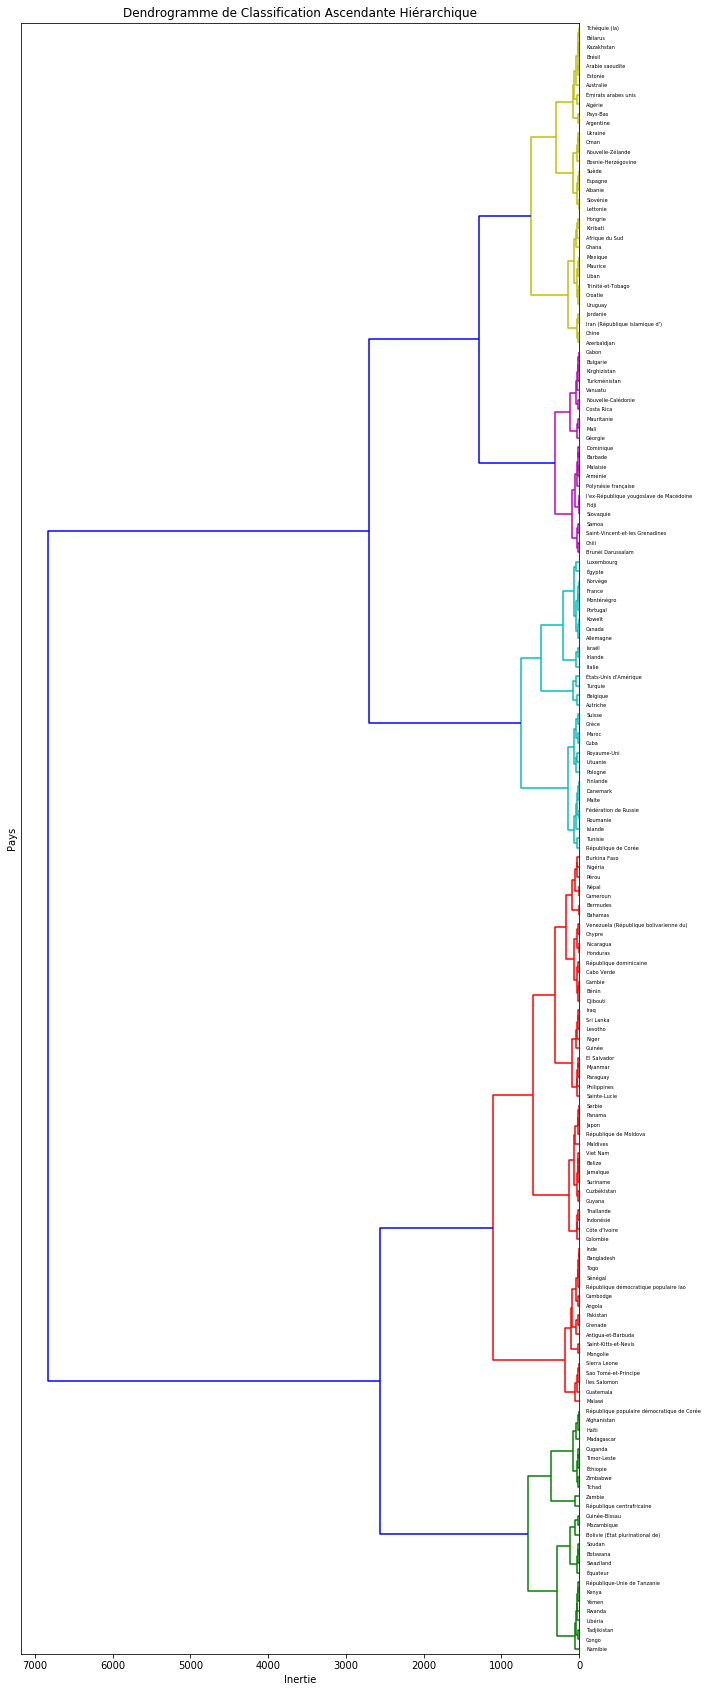

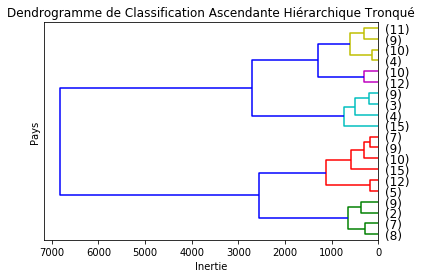

In [51]:

X = df_base.values 
#Y = ssd.pdist(X) #Ne prend pas de str
Z = sch.linkage(X,method='ward',metric='euclidean')
#La méthode de Ward consiste à regrouper les classes de façon que l'augmentation de ...
#...l'inertie interclasse soit maximum, ou ce qui revient au même d'après le théorème de Huygens,..
#...de façon que l'augmentation de l'inertie intraclasse soit minimum

plt.figure(figsize=(10,30))
plt.title('Dendrogramme de Classification Ascendante Hiérarchique')
plt.xlabel("Inertie")
plt.ylabel('Pays')
entire_dendro = sch.dendrogram(Z,labels = df_base.index,color_threshold=1200, orientation='left')
plt.show(entire_dendro)

plt.title('Dendrogramme de Classification Ascendante Hiérarchique Tronqué')
plt.xlabel("Inertie")
plt.ylabel('Pays')
truncate_dendro = sch.dendrogram(Z,labels = df_base.index,color_threshold=1200, orientation='left', p=20, truncate_mode='lastp')
plt.show(truncate_dendro)

## Choix du nombre de groupe (les 3 règles)
1- Le nombre de groupe doit être cohérent d’un point de vue métier. C’est l’interprétation des résultats qui vous permettra de vérifier que vos groupes ont du sens. <br/>
2- Le nombre de groupe doit être exploitable : une segmentation de 8 groupes ça commence déjà à faire beaucoup pour une exploitation opérationnelle.<br/>
3- Les groupes doivent être le plus homogènes possible (les individus d’un groupe se ressemblent et les groupes sont différents les uns des autres). Cela se traduit, sur le dendrogramme, par le fait de couper au niveau d’une branche « longue »

# Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vue de vos objectifs.

## Caractérisez chacun de ces groupes selon les variables cités précédemment

Caratérisez chacun des groupes = Analyse Univarié ou Bivarié pour chacun des groupes pour trouver des critéres de distinctions

### Decoupage en classes - Matérialisation des groupes

In [52]:
#découpage á la hauteur t=46 --> identifiants de 5 groupes
groupes_cah = sch.fcluster(Z,t=1200,criterion='distance')
print(groupes_cah)



[4 1 5 5 2 2 5 5 3 2 4 2 2 1 1 5 2 2 4 4 2 2 3 2 1 2 1 4 2 1 4 3 2 5 2 3 4
 2 5 1 3 2 5 4 3 3 4 2 4 4 2 3 5 5 5 3 2 2 2 2 1 2 5 5 3 2 2 5 2 3 3 3 2 5
 2 2 5 4 1 2 1 3 3 5 2 5 2 1 3 1 2 4 2 4 3 4 5 5 2 3 1 2 1 2 5 4 4 4 5 2 2
 2 3 2 2 5 2 2 2 3 3 1 1 1 3 1 3 2 2 4 2 5 2 2 5 4 5 5 2 1 1 5 3 4 1 2 2 5
 5 3 3 5 1 3 5 3 2 5 2 2 2 1 4 1 1 3 3 2 3 1 5]


In [53]:
#index triés des groupes
idg = np.argsort(groupes_cah)

In [54]:
#affichage des observations et leurs groupes
df_groupes_cah = pd.DataFrame(df_base.index[idg],groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'groupe_cah'})
print(df_groupes_cah)

     groupe_cah                                        Pays
0             1                                    Éthiopie
1             1                                  Madagascar
2             1                               Guinée-Bissau
3             1                                     Ouganda
4             1                                 Timor-Leste
5             1                                    Équateur
6             1                                    Zimbabwe
7             1                                      Rwanda
8             1                                       Yémen
9             1                                       Haïti
10            1                                     Libéria
11            1                                       Congo
12            1                                       Tchad
13            1                                   Swaziland
14            1                                      Zambie
15            1                   Républ

In [55]:
#Réindexation df_base pour jointure
df_base.reset_index(inplace=True)

In [56]:
joint_df_base_cah_group = pd.merge(df_groupes_cah,df_base)
joint_df_base_cah_group

,groupe_cah,Pays,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,1,Éthiopie,2.585878,2129.0,60.39,12.733896
1,1,Madagascar,2.830358,2056.0,46.69,21.503534
2,1,Guinée-Bissau,2.403846,2288.0,44.05,20.408627
3,1,Ouganda,3.392395,2126.0,52.64,23.537234
4,1,Timor-Leste,1.705566,2129.0,57.51,31.333681
5,1,Équateur,1.587916,2346.0,61.30,59.624796
6,1,Zimbabwe,3.104051,2113.0,48.32,24.482616
7,1,Rwanda,2.784081,2224.0,56.79,9.860891
8,1,Yémen,2.326849,2217.0,58.90,23.684211
9,1,Haïti,1.405544,2089.0,47.70,21.299790


### Construction des dataframes de chaque groupe

In [57]:
df_groupe1 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==1]
df_groupe2 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==2]
df_groupe3 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==3]
df_groupe4 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==4]
df_groupe5 = joint_df_base_cah_group[joint_df_base_cah_group['groupe_cah']==5]

### Analyse univariée

#### Groupe 1

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :blue
Donner le nom du titre du graphique :
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :


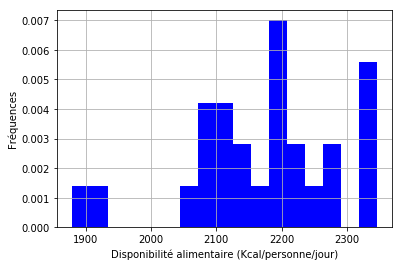

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Moyenne = 2173.576923076923
        - Médiane = 2201.5
        - Mode = 0    2129.0
1    2206.0
dtype: float64
Variable Disponibilité alimentaire (Kcal/personne/jour) :
        - Variance = 13072.782544378699
        - Ecart-type = 114.33626959271804


In [59]:
mfct.analyse_univarie(df_groupe1,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

In [ ]:
analyse_univarie(df_groupe1,'Evolution population 2012/2013 en pourcentage','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe1,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe1,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 2

In [ ]:
mfct.analyse_univarie(df_groupe2,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe2,'Evolution population 2012/2013 en pourcentage','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe2,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe2,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 3

In [ ]:
mfct.analyse_univarie(df_groupe3,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe3,'Evolution population 2012/2013 en pourcentage','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe3,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe3,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 4

In [ ]:
mfct.analyse_univarie(df_groupe4,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe4,'Evolution population 2012/2013 en pourcentage','qtecont')

In [ ]:
analyse_univarie(df_groupe4,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe4,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

#### Groupe 5

In [ ]:
mfct.analyse_univarie(df_groupe5,'Disponibilité alimentaire (Kcal/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe5,'Evolution population 2012/2013 en pourcentage','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe5,'Disponibilité de protéines en quantité (g/personne/jour)','qtecont')

In [ ]:
mfct.analyse_univarie(df_groupe5,"Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)",'qtecont')

### Conclusion / Synthèse

#### Calcul des moyennes par groupe (centroïdes)

In [60]:
df_synthese_moyenne = joint_df_base_cah_group.groupby('groupe_cah').mean()
df_synthese_moyenne

,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
groupe_cah,,,,
1,2.282213,2173.576923,55.654231,27.232617
2,1.574862,2599.810345,70.381897,37.114192
3,0.653198,3481.967742,107.558065,53.689526
4,0.989683,2902.272727,83.527273,49.355988
5,1.064611,3151.470588,92.103529,49.429386


#### Calcule des écarts-type pour chacun des groupes

In [61]:
df_synthese_e_type = joint_df_base_cah_group.groupby('groupe_cah').std(ddof=0)
df_synthese_e_type

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Evolution population 2012/2013 en pourcentage,Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
groupe_cah,,,,
1,114.336270,7.681832,0.708901,11.840546
2,124.706201,11.799672,0.978651,16.245572
3,119.262650,9.139613,0.779381,11.755430
4,53.110675,6.871370,0.976111,9.284113
5,86.471769,10.456261,1.800735,11.891562


##### Synthèse variable Dispo alimentaire

Text(0,0.5,'Fréquences')

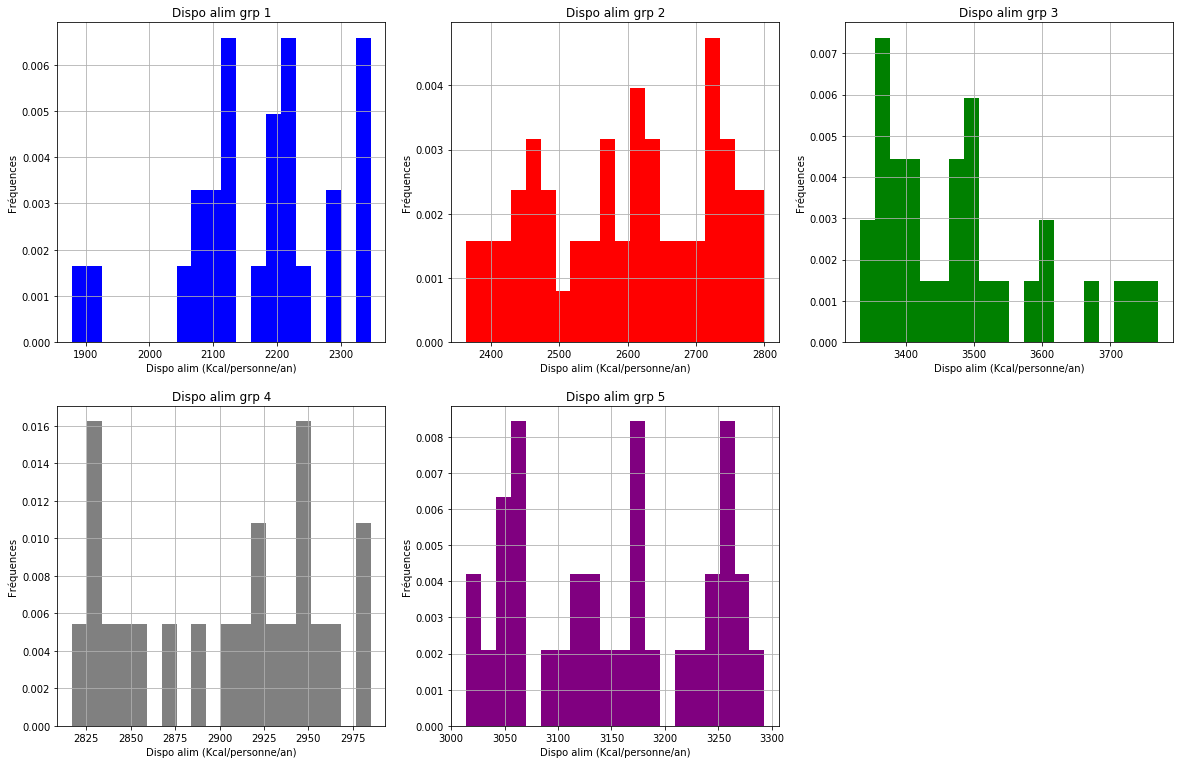

In [62]:
plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('Dispo alim grp 1')
plot_df_groupe1.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('Dispo alim grp 2')
plot_df_groupe2.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('Dispo alim grp 3')
plot_df_groupe3.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('Dispo alim grp 4')
plot_df_groupe4.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('Dispo alim grp 5')
plot_df_groupe5.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_groupe5.set_ylabel('Fréquences')

Le groupe 3 est le groupe qui la plus grande disponibilité alimentaire

##### Synthèse Disponibilité alimentaire en protéine

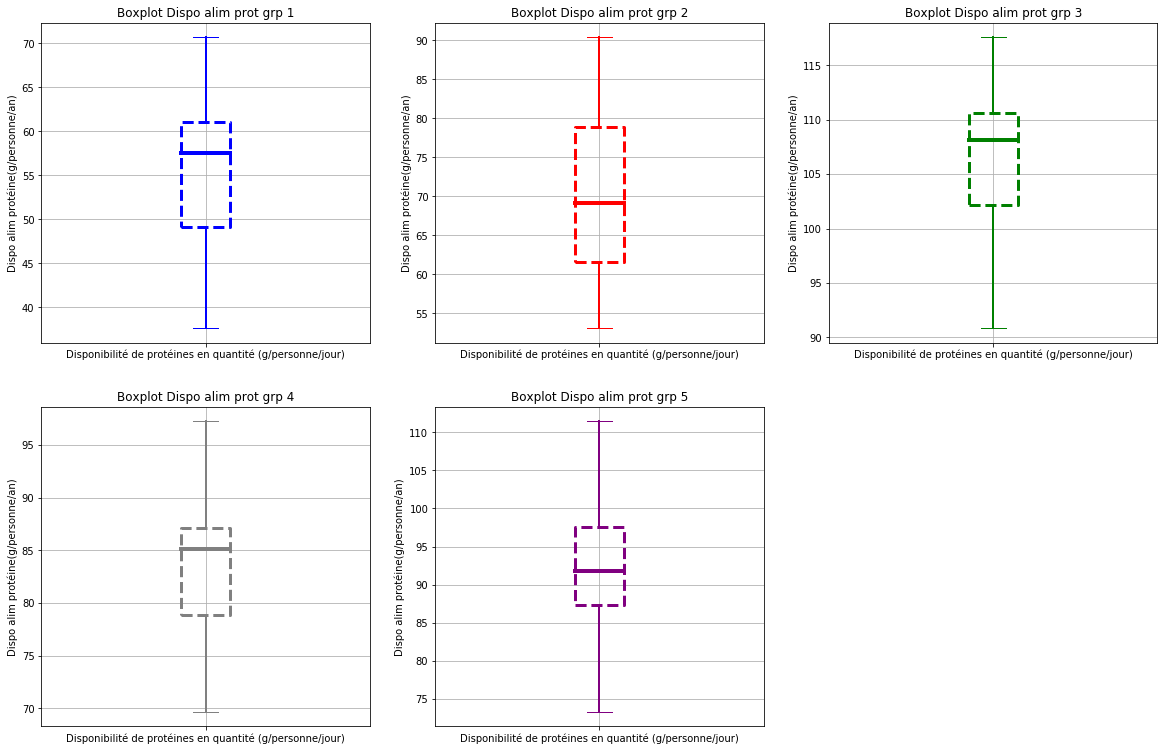

In [63]:
figure = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_groupe1= plt.subplot(3,3,1)
BoxplotElements = df_groupe1.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe1.set_title('Boxplot Dispo alim prot grp 1')
plot_df_groupe1.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('blue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('blue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('blue')
    
plot_df_groupe2= plt.subplot(3,3,2)
BoxplotElements = df_groupe2.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe2.set_title('Boxplot Dispo alim prot grp 2')
plot_df_groupe2.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('red')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('red')

plot_df_groupe3= plt.subplot(3,3,3)
BoxplotElements = df_groupe3.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe3.set_title('Boxplot Dispo alim prot grp 3')
plot_df_groupe3.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('green')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('green')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('green')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('green')
    
plot_df_groupe4= plt.subplot(3,3,4)
BoxplotElements = df_groupe4.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe4.set_title('Boxplot Dispo alim prot grp 4')
plot_df_groupe4.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('grey')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('grey')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('grey')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('grey')
    
plot_df_groupe5= plt.subplot(3,3,5)
BoxplotElements = df_groupe5.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_df_groupe5.set_title('Boxplot Dispo alim prot grp 5')
plot_df_groupe5.set_ylabel('Dispo alim protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('purple')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('purple')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('purple')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('purple')

Le groupe 3 a la disponibilité alimentaire en protéine la plus forte

##### Synthèse Evolution population

Text(0,0.5,'Fréquences')

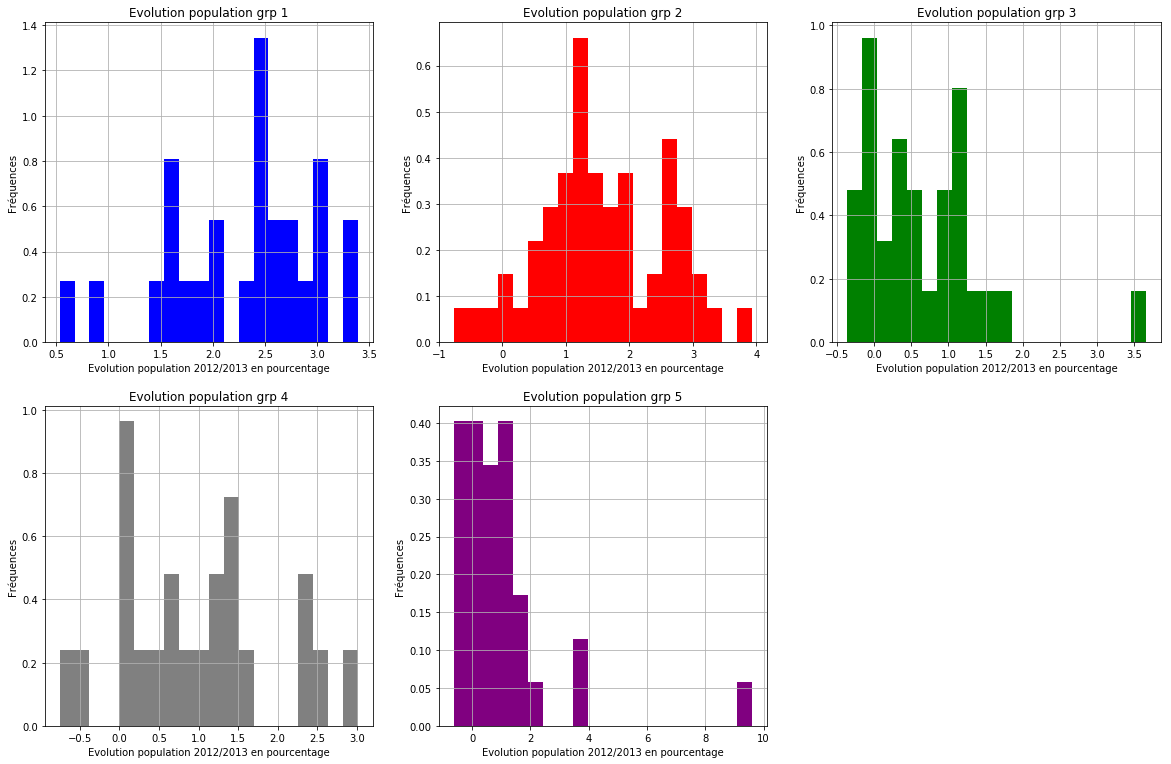

In [64]:
plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_groupe1 = df_groupe1['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='blue')
plot_df_groupe1.set_title('Evolution population grp 1')
plot_df_groupe1.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_groupe2 = df_groupe2['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='red')
plot_df_groupe2.set_title('Evolution population grp 2')
plot_df_groupe2.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_groupe3 = df_groupe3['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='green')
plot_df_groupe3.set_title('Evolution population grp 3')
plot_df_groupe3.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_groupe4 = df_groupe4['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='grey')
plot_df_groupe4.set_title('Evolution population grp 4')
plot_df_groupe4.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_groupe5 = df_groupe5['Evolution population 2012/2013 en pourcentage'].hist(density=True, bins=20,color='purple')
plot_df_groupe5.set_title('Evolution population grp 5')
plot_df_groupe5.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_groupe5.set_ylabel('Fréquences')

Le groupe 5 a la plus forte croissance démographique

##### Synthèse proportion protéine animale dans disponibilité protéine totale

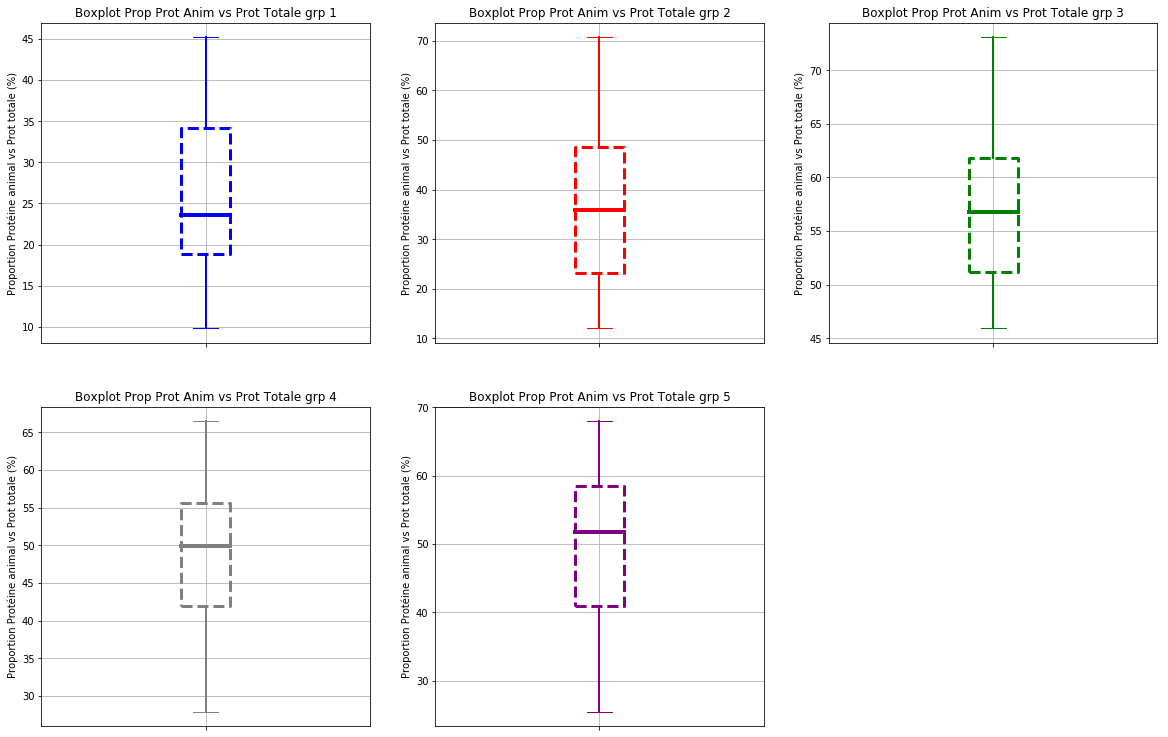

In [65]:
figure = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_groupe1= plt.subplot(3,3,1)
BoxplotElements = df_groupe1.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe1.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 1')
plot_df_groupe1.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe1.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('blue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('blue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('blue')
    
plot_df_groupe2= plt.subplot(3,3,2)
BoxplotElements = df_groupe2.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe2.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 2')
plot_df_groupe2.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe2.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('red')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('red')

plot_df_groupe3= plt.subplot(3,3,3)
BoxplotElements = df_groupe3.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe3.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 3')
plot_df_groupe3.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe3.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('green')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('green')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('green')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('green')
    
plot_df_groupe4= plt.subplot(3,3,4)
BoxplotElements = df_groupe4.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe4.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 4')
plot_df_groupe4.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe4.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('grey')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('grey')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('grey')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('grey')
    
plot_df_groupe5= plt.subplot(3,3,5)
BoxplotElements = df_groupe5.boxplot(column="Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)", showfliers=False,return_type='dict')
plot_df_groupe5.set_title('Boxplot Prop Prot Anim vs Prot Totale grp 5')
plot_df_groupe5.set_ylabel('Proportion Protéine animal vs Prot totale (%)')
plot_df_groupe5.xaxis.set_ticklabels('')
for element in BoxplotElements['medians']:
    element.set_color('purple')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('purple')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('purple')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('purple')

Le groupe 3 a la plus forte proportion de protéine animale par rapport la disponibilité de protéine totale

## Caractérisez chacun de ces groupes selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vue de vos objectifs.

### Ajout de la variable PIB par Habitant

In [89]:
df_base_cah_group=joint_df_base_cah_group.copy()
df_pib_habitant = pd.read_csv('/home/silvock/Documents/Openclassrooms/Formation_data_analyst/project_5_prod_market_study/fichiers_csv/pib_habitant_2013.csv')
df_pib_habitant = df_pib_habitant[['Zone','Valeur']] 
df_pib_habitant.columns =['Pays','PiB par habitant (PPA)']
# PPA =  méthode utilisée en économie pour établir une comparaison entre pays du pouvoir d'achat des devises nationales, ce qu’une simple utilisation des taux de change ne permet pas de faire.
df_base_cah_group_pib = pd.merge(df_pib_habitant,df_base_cah_group)
df_base_cah_group_pib

,Pays,PiB par habitant (PPA),groupe_cah,Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,Afghanistan,1814.2,1,2.437552,2087.0,58.26,20.992104
1,Afrique du Sud,12445.6,5,0.744474,3020.0,85.33,42.646197
2,Albanie,10504.1,5,0.347881,3188.0,111.37,53.461435
3,Algérie,13253.2,5,1.886596,3293.0,91.92,27.241079
4,Allemagne,42914.5,3,-0.088164,3503.0,101.39,60.656870
5,Angola,6185.0,2,3.126651,2474.0,57.27,32.268203
6,Antigua-et-Barbuda,18862.8,2,1.123596,2416.0,83.49,68.391424
7,Arabie saoudite,49537.6,5,1.912472,3255.0,91.59,44.207883
8,Argentine,19482.2,5,0.873756,3226.0,102.60,65.233918
9,Arménie,7727.9,4,0.269451,2924.0,90.06,48.123473


In [90]:
df_base_cah_group_pib = df_base_cah_group_pib.fillna(0)
df_base_cah_group_pib.dropna(how = 'any')

df_base_cah_group_pib.index = df_base_cah_group_pib['Pays']
del df_base_cah_group_pib['Pays']
del df_base_cah_group_pib['groupe_cah']


In [91]:
df_base_cah_group_pib

,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
Pays,,,,,
Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104
Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197
Albanie,10504.1,0.347881,3188.0,111.37,53.461435
Algérie,13253.2,1.886596,3293.0,91.92,27.241079
Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870
Angola,6185.0,3.126651,2474.0,57.27,32.268203
Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883
Argentine,19482.2,0.873756,3226.0,102.60,65.233918


### Calcul des centroïdes (Methode CAH)

In [101]:
X = pd.DataFrame(df_base_cah_group_pib.values)
#y = df_base_cah_group_pib.index

est = AgglomerativeClustering(n_clusters=5)
Y = pd.DataFrame(est.fit_predict(X), columns=['cluster ID'])
Z = df_base_cah_group_pib.reset_index()
result = pd.concat([Y, Z], axis=1)
result.head(10)

,cluster ID,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,2,Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104
1,0,Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197
2,0,Albanie,10504.1,0.347881,3188.0,111.37,53.461435
3,0,Algérie,13253.2,1.886596,3293.0,91.92,27.241079
4,1,Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870
5,2,Angola,6185.0,3.126651,2474.0,57.27,32.268203
6,0,Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
7,3,Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883
8,0,Argentine,19482.2,0.873756,3226.0,102.60,65.233918
9,2,Arménie,7727.9,0.269451,2924.0,90.06,48.123473


In [106]:
df_group_centroid_ward = result.groupby('cluster ID').mean()

In [107]:
df_group_centroid_ward

,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
cluster ID,,,,,
0,16715.353968,0.771412,2966.492063,86.333968,48.922366
1,38275.204348,0.972785,3329.391304,104.214348,59.327149
2,3646.573684,1.913598,2539.447368,66.868816,30.675032
3,55466.733333,1.038192,3292.666667,99.916667,56.980949
4,81368.266667,2.087629,3341.333333,105.026667,57.218575


#### Pays à cibler avec 5 groupes (Agglo - Ward)

In [108]:
pays_a_cibler = result[result['cluster ID']==4]
pays_a_cibler

,cluster ID,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
25,4,Brunéi Darussalam,79070.2,1.456311,2985.0,93.29,57.969772
85,4,Koweït,74084.5,3.661538,3499.0,108.15,49.958391
92,4,Luxembourg,90950.1,1.145038,3540.0,113.64,63.727561


### Pour aller plus loin : Calcul des centroïdes (Methode Kmean) de chacun des groupes (5 groupes)

In [82]:
X = pd.DataFrame(df_base_cah_group_pib.values)
#y = df_base_cah_group_pib.index

est = KMeans(n_clusters=5)
Y = pd.DataFrame(est.fit_predict(X), columns=['cluster ID'])
Z = pd.DataFrame(est.cluster_centers_[Y['cluster ID']],columns=['centroid_pib', 'centroid_evol','centroid_dispo_alim_kcal','centroid_dispo_prot','centroid_prop'])
result = pd.concat([Y, Z], axis=1)
result.head(10)


,cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
0,3,3578.438667,1.888701,2531.986667,66.699333,30.627302
1,0,13697.954348,1.031835,2891.239130,83.153913,46.129732
2,0,13697.954348,1.031835,2891.239130,83.153913,46.129732
3,0,13697.954348,1.031835,2891.239130,83.153913,46.129732
4,4,43850.805263,1.117840,3351.315789,104.223684,60.948764
5,3,3578.438667,1.888701,2531.986667,66.699333,30.627302
6,0,13697.954348,1.031835,2891.239130,83.153913,46.129732
7,4,43850.805263,1.117840,3351.315789,104.223684,60.948764
8,0,13697.954348,1.031835,2891.239130,83.153913,46.129732
9,3,3578.438667,1.888701,2531.986667,66.699333,30.627302


In [83]:
df_base_cah_group_pib = df_base_cah_group_pib.reset_index()
df_base_with_centroid = df_base_cah_group_pib.join(result)


In [84]:
df_group_centroid_kmeans = df_base_with_centroid.groupby('cluster ID').first().reset_index()

In [104]:
del df_group_centroid_kmeans['Pays']

In [105]:
df_group_centroid_kmeans

,cluster ID,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
0,0,12445.6,0.744474,3020.0,85.33,42.646197,13697.954348,1.031835,2891.239130,83.153913,46.129732
1,1,79070.2,1.456311,2985.0,93.29,57.969772,73887.380000,1.752962,3356.400000,106.064000,54.783257
2,2,22714.8,1.344086,2670.0,86.16,67.490715,26398.107692,0.376068,3188.076923,95.941538,55.404586
3,3,1814.2,2.437552,2087.0,58.26,20.992104,3578.438667,1.888701,2531.986667,66.699333,30.627302
4,4,42914.5,-0.088164,3503.0,101.39,60.656870,43850.805263,1.117840,3351.315789,104.223684,60.948764


#### Pays à cibler avec 5 groupes (Kmeans)

In [248]:
pays_a_cibler = df_base_with_centroid[df_base_with_centroid['cluster ID']==4]
pays_a_cibler

,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
25,Brunéi Darussalam,79070.2,1.456311,2985.0,93.29,57.969772,4,73887.38,1.752962,3356.4,106.064,54.783257
46,Émirats arabes unis,62532.7,1.520747,3275.0,104.51,40.082289,4,73887.38,1.752962,3356.4,106.064,54.783257
85,Koweït,74084.5,3.661538,3499.0,108.15,49.958391,4,73887.38,1.752962,3356.4,106.064,54.783257
92,Luxembourg,90950.1,1.145038,3540.0,113.64,63.727561,4,73887.38,1.752962,3356.4,106.064,54.783257
112,Norvège,62799.4,0.981177,3483.0,110.73,62.178271,4,73887.38,1.752962,3356.4,106.064,54.783257


### Calcul des centroïdes avec 6 groupes (Agglo - Ward)

In [110]:
X = pd.DataFrame(df_base_cah_group_pib.values)
#y = df_base_cah_group_pib.index

est = AgglomerativeClustering(n_clusters=6)
Y = pd.DataFrame(est.fit_predict(X), columns=['cluster ID'])
Z = df_base_cah_group_pib.reset_index()
result = pd.concat([Y, Z], axis=1)
result.head(10)

,cluster ID,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,2,Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104
1,1,Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197
2,1,Albanie,10504.1,0.347881,3188.0,111.37,53.461435
3,1,Algérie,13253.2,1.886596,3293.0,91.92,27.241079
4,0,Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870
5,2,Angola,6185.0,3.126651,2474.0,57.27,32.268203
6,1,Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
7,3,Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883
8,1,Argentine,19482.2,0.873756,3226.0,102.60,65.233918
9,2,Arménie,7727.9,0.269451,2924.0,90.06,48.123473


In [111]:
df_group_centroid_ward = result.groupby('cluster ID').mean()

In [112]:
df_group_centroid_ward

,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
cluster ID,,,,,
0,38275.204348,0.972785,3329.391304,104.214348,59.327149
1,13945.706522,0.941061,2890.304348,83.255870,46.622544
2,3646.573684,1.913598,2539.447368,66.868816,30.675032
3,55466.733333,1.038192,3292.666667,99.916667,56.980949
4,81368.266667,2.087629,3341.333333,105.026667,57.218575
5,24209.694118,0.312361,3172.647059,94.662941,55.145413


#### Pays à cibler avec 6 groupes (Agglo - Ward)

In [115]:
pays_a_cibler = result[result['cluster ID']==4]
pays_a_cibler

,cluster ID,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
25,4,Brunéi Darussalam,79070.2,1.456311,2985.0,93.29,57.969772
85,4,Koweït,74084.5,3.661538,3499.0,108.15,49.958391
92,4,Luxembourg,90950.1,1.145038,3540.0,113.64,63.727561


### Calcul des centroides avec 6 groupes (Kmeans)

In [120]:
df_base_cah_group_pib2 = df_base_cah_group_pib.copy()
df_base_cah_group_pib2

,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
Pays,,,,,
Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104
Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197
Albanie,10504.1,0.347881,3188.0,111.37,53.461435
Algérie,13253.2,1.886596,3293.0,91.92,27.241079
Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870
Angola,6185.0,3.126651,2474.0,57.27,32.268203
Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883
Argentine,19482.2,0.873756,3226.0,102.60,65.233918


In [121]:
#df_base_cah_group_pib2.index = df_base_cah_group_pib2['Pays']
#del df_base_cah_group_pib2['Pays']

In [122]:
X = pd.DataFrame(df_base_cah_group_pib2.values)
#y = df_base_cah_group_pib.index

est = KMeans(n_clusters=6)
Y = pd.DataFrame(est.fit_predict(X), columns=['cluster ID'])
Z = pd.DataFrame(est.cluster_centers_[Y['cluster ID']],columns=['centroid_pib', 'centroid_evol','centroid_dispo_alim_kcal','centroid_dispo_prot','centroid_prop'])
result = pd.concat([Y, Z], axis=1)
result.head(10)

,cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
0,0,2975.648485,2.041965,2500.272727,65.435000,29.062653
1,5,12128.286000,1.012463,2861.880000,80.961600,44.195144
2,5,12128.286000,1.012463,2861.880000,80.961600,44.195144
3,5,12128.286000,1.012463,2861.880000,80.961600,44.195144
4,3,40350.372222,1.069231,3373.555556,105.166111,59.966091
5,0,2975.648485,2.041965,2500.272727,65.435000,29.062653
6,2,24336.528571,0.420266,3129.535714,94.936429,56.094785
7,1,55466.733333,1.038192,3292.666667,99.916667,56.980949
8,2,24336.528571,0.420266,3129.535714,94.936429,56.094785
9,5,12128.286000,1.012463,2861.880000,80.961600,44.195144


In [123]:
df_base_cah_group_pib2 = df_base_cah_group_pib2.reset_index()
df_base_with_centroid2 = df_base_cah_group_pib2.join(result)

In [124]:
df_group_centroid2 = df_base_with_centroid2.groupby('cluster ID').first().reset_index()
df_group_centroid2

,cluster ID,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
0,0,Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104,2975.648485,2.041965,2500.272727,65.435000,29.062653
1,1,Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883,55466.733333,1.038192,3292.666667,99.916667,56.980949
2,2,Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424,24336.528571,0.420266,3129.535714,94.936429,56.094785
3,3,Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870,40350.372222,1.069231,3373.555556,105.166111,59.966091
4,4,Brunéi Darussalam,79070.2,1.456311,2985.0,93.29,57.969772,81368.266667,2.087629,3341.333333,105.026667,57.218575
5,5,Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197,12128.286000,1.012463,2861.880000,80.961600,44.195144


#### Pays à cibler avec 6 groupes

In [125]:
pays_a_cibler2 = df_base_with_centroid2[df_base_with_centroid2['cluster ID']==1]
pays_a_cibler2

,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%),cluster ID,centroid_pib,centroid_evol,centroid_dispo_alim_kcal,centroid_dispo_prot,centroid_prop
7,Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883,1,55466.733333,1.038192,3292.666667,99.916667,56.980949
20,Bermudes,50669.3,0.000000,2668.0,90.36,67.319610,1,55466.733333,1.038192,3292.666667,99.916667,56.980949
46,Émirats arabes unis,62532.7,1.520747,3275.0,104.51,40.082289,1,55466.733333,1.038192,3292.666667,99.916667,56.980949
50,États-Unis d'Amérique,51008.5,0.801877,3682.0,109.42,63.763480,1,55466.733333,1.038192,3292.666667,99.916667,56.980949
112,Norvège,62799.4,0.981177,3483.0,110.73,62.178271,1,55466.733333,1.038192,3292.666667,99.916667,56.980949
150,Suisse,56252.9,1.012880,3393.0,92.89,64.334159,1,55466.733333,1.038192,3292.666667,99.916667,56.980949


## Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP

In [131]:
df_base_cah_group_pib3 = df_base_cah_group_pib2.copy()

df_base_cah_group_pib3.index = df_base_cah_group_pib3['Pays']
del df_base_cah_group_pib3['Pays']


In [133]:
acp = PCA(n_components=2).fit_transform(df_base_cah_group_pib3.values)
df_acp = pd.DataFrame(data = acp, columns = ['principal component 1', 'principal component 2'])


In [134]:
df_base_cah_group_pib3 = df_base_cah_group_pib3.reset_index()
a = df_acp.join(df_base_cah_group_pib3['Pays'])
b = a.join(df_base_with_centroid2['cluster ID'])

In [135]:
b.head(10)

,principal component 1,principal component 2,Pays,cluster ID
0,-14497.481394,508.604876,Afghanistan,0
1,-3851.637704,-242.572554,Afrique du Sud,5
2,-5789.949150,-444.736402,Albanie,5
3,-3039.486964,-501.569778,Algérie,5
4,26621.074362,-203.635792,Allemagne,3
5,-10120.692769,196.754463,Angola,0
6,2554.292572,470.732607,Antigua-et-Barbuda,2
7,33238.937158,158.216733,Arabie saoudite,1
8,3187.481464,-328.625517,Argentine,2
9,-8570.280455,-227.743916,Arménie,5


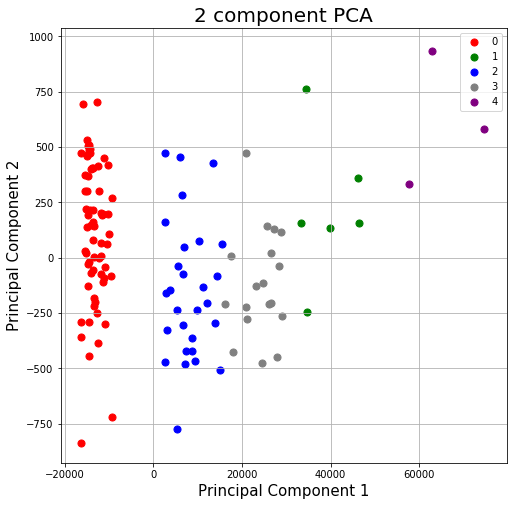

In [136]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1,2,3,4]
colors = ['r', 'g', 'b','grey','purple']

for target, color in zip(targets,colors):
    indicesToKeep = b['cluster ID'] == target
    ax.scatter(b.loc[indicesToKeep, 'principal component 1']
               , b.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Ordonnés = Consommation de protéines
Abcisses = Potentiel d'achat

## Réaliser un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, choisissez-en une et testez son adéquation à une loi de votre choix

Ici les variables sont quantitatives continues (test de Kolmogorov Smirnov), nous choisirons la variable PIB par habitant

In [316]:
df_base_cah_group_pib.head(10)

,Pays,PiB par habitant (PPA),Evolution population 2012/2013 en pourcentage,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays (%)
0,Afghanistan,1814.2,2.437552,2087.0,58.26,20.992104
1,Afrique du Sud,12445.6,0.744474,3020.0,85.33,42.646197
2,Albanie,10504.1,0.347881,3188.0,111.37,53.461435
3,Algérie,13253.2,1.886596,3293.0,91.92,27.241079
4,Allemagne,42914.5,-0.088164,3503.0,101.39,60.656870
5,Angola,6185.0,3.126651,2474.0,57.27,32.268203
6,Antigua-et-Barbuda,18862.8,1.123596,2416.0,83.49,68.391424
7,Arabie saoudite,49537.6,1.912472,3255.0,91.59,44.207883
8,Argentine,19482.2,0.873756,3226.0,102.60,65.233918
9,Arménie,7727.9,0.269451,2924.0,90.06,48.123473


In [317]:
ks_2samp(df_base_cah_group_pib["PiB par habitant (PPA)"],list(np.random.normal(np.mean(df_base_cah_group_pib["PiB par habitant (PPA)"]), np.std(df_base_cah_group_pib["PiB par habitant (PPA)"]), 1000)))

Ks_2sampResult(statistic=0.17, pvalue=0.00036027493638924154)

Conclusion : La quantité est très petite, on rejette H1 (F différent de F0) et on garde H0. La variable PIB par habitant suit la loi normale.

## Réaliser un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Trouvez une variable (parmi les 4 proposées ou une autre variable de votre choix) qui soit gaussienne sur ces 2 clusters (en réalisant un test d'adéquation), puis effectuez le test de comparaison.

In [331]:
cluster_0 = df_base_with_centroid2[df_base_with_centroid2['cluster ID'] == 0]['PiB par habitant (PPA)']
cluster_1 = df_base_with_centroid2[df_base_with_centroid2['cluster ID'] == 1]['PiB par habitant (PPA)']


On teste tout d’abord l’égalité des variances à l’aide de la commande :

In [332]:
bartlett(cluster_0,cluster_1)

BartlettResult(statistic=84.40849017198593, pvalue=4.024160129999987e-20)

La p-valeur valant 4×10-20, on ne rejette donc pas l’égalité des variances au niveau de test 5%. Les deux échantillons n'ont pas la même loi.

On teste ensuite l’égalité des moyennes à l’aide de la commande :

In [333]:
ttest_ind(cluster_0,cluster_1, equal_var=True)

Ttest_indResult(statistic=-27.687665131845012, pvalue=3.404754768374234e-54)

On obtient une p-valeur égale à environ 3.4×10−54. On constate donc que l’hypothèse d’égalité des moyennes entre cluster 0 et 1 de la variable PIB par habitants est (très facilement) rejetée à un niveau de test de 5%.

J'ai pu comparer mes deux clusters dans le cas gaussien car précédemment je me suis assuré que ma variable suivait une loi normale (gaussienne)